In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
df = pd.read_csv('Manual.csv')

In [4]:
df.head(10)

,name,age,gender,education,duration,no_company_10,no_job_positions,current_job,senior,manager,level_of_education,years_of_experience,years before mang,linkedin link
0,Kyle,35,M,science,5.0,3,5.0,director of data science,1,1,NaN,NaN,NaN,NaN
1,Mojan Benham\n,30,F,computer science,3.0,4,2.0,senior data scientist,1,0,NaN,NaN,NaN,https://www.linkedin.com/in/mojan-benham/
2,Divesh Kumar,33,M,computer science,1.0,5,2.0,senior program manager,1,1,NaN,NaN,NaN,https://www.linkedin.com/in/diveshkmr/
3,Jess McGinnis,27,M,computer science,4.0,4,3.0,development manager,0,1,NaN,NaN,NaN,https://www.linkedin.com/in/jessicamcginnis/
4,Delaney Manders,36,F,science,3.0,10,3.0,vp engineering,1,1,NaN,NaN,NaN,https://www.linkedin.com/in/delaneymanders/
5,Chris Bildfell,40,M,science,5.0,2,3.0,data science manager,1,1,NaN,NaN,NaN,https://www.linkedin.com/in/chrisbildfell/
6,Cathy Polinsky,42,F,computer science,0.5,10,1.0,vp engineering,1,1,NaN,NaN,NaN,https://www.linkedin.com/in/polinsky/
7,Y.R Ryan Li,32,M,other,1.0,3,1.0,senior analyst,1,0,NaN,NaN,NaN,https://www.linkedin.com/in/yr-ryanli/
8,Solmaz Shahalizadeh,35,F,computer science,7.0,7,6.0,\nVP Commerce Intelligence,1,0,NaN,NaN,NaN,https://www.linkedin.com/in/solmazshahalizadeh/
9,Ian Whitestone,28,M,engineering,2.0,2,2.0,senior data scientist,1,0,NaN,NaN,NaN,https://www.linkedin.com/in/ian-whitestone-a20...


In [3]:
#making a copy of the data
df_copy = df.copy(deep=True)

In [4]:
#correction functions
def correct_education(row):
    if row == 'computer scince ' or row =='software eng.':
        row = 'computer science'
    if row == 'engineering ':
        row = 'engineering'
    if row == 'scince' or row == 'scinece':
        row = 'science'
    
    return row

In [5]:
#fixing typos in the education columns
df_copy['education'] = df_copy['education'].apply(correct_education)

In [6]:
#setting all the candidates who are manger as senior
df_copy.loc[df_copy['manager'] == 1, 'senior'] = 1

In [7]:
df_copy_male = df_copy.loc[df_copy['gender'] == 'M']
df_copy_female = df_copy.loc[df_copy['gender'] == 'F']

In [8]:
def plot_dist(data,column,x_label,y_label):
    x = data[column].values
    fig,ax = plt.subplots(figsize=(8,6))
    ax.set(xlabel=x_label,ylabel=y_label)
    ax = sns.distplot(x,bins=15)
        
def bar_plot(values, labels,x_label,y_label,title):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(labels,values)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.title(title,fontsize=14)
    plt.show()
    
def pie_chart(values,labels,title,sub=None):
    fig1, ax1 = plt.subplots(figsize=(8,6))
    explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title,fontsize=14)

    plt.show()

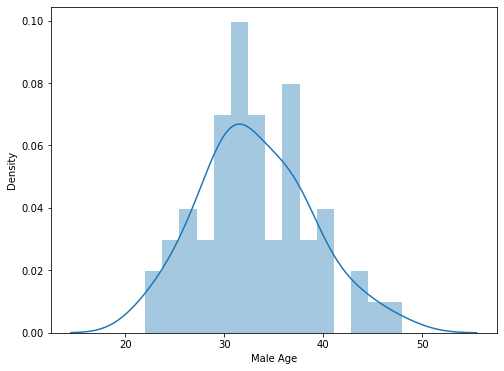

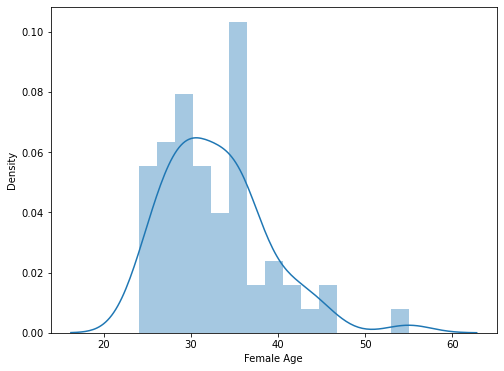

In [9]:
plot_dist(df_copy_male,'age','Male Age','Density')
plot_dist(df_copy_female,'age','Female Age','Density')

In [10]:
df_copy.hea

,name,age,gender,education,duration,no_company_10,no_job_positions,current_job,senior,manager
0,Kyle,35,M,science,5.0,3,5.0,director of data science,1,1
1,Mojan Benham\r,30,F,computer science,3.0,4,2.0,senior data scientist,1,0
2,Divesh Kumar,33,M,computer science,1.0,5,2.0,senior program manager,1,1
3,Jess McGinnis,27,M,computer science,4.0,4,3.0,development manager,1,1
4,Delaney Manders\r,36,F,science,3.0,10,3.0,vp engineering,1,1
5,Chris Bildfell,40,M,science,5.0,2,3.0,data science manager,1,1
6,Cathy Polinsky\r,42,F,computer science,0.5,10,1.0,vp engineering,1,1
7,Y.R Ryan Li,32,M,other,1.0,3,1.0,senior analyst,1,0
8,Solmaz Shahalizadeh\r,35,F,computer science,7.0,7,6.0,\nVP Commerce Intelligence,1,0
9,Ian Whitestone,28,M,engineering,2.0,2,2.0,senior data scientist,1,0


number of senior male and average age for male senior: 34.1875 , 48
number of senior female and average age for female senior: 35.13333333333333 , 30
--------------------------------------------------------------------------------------------------------------


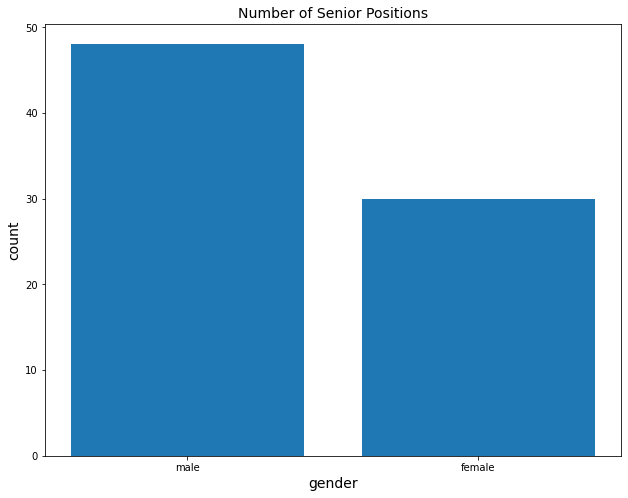

In [10]:
#number of men and women in senior levels
senior_male_count = df_copy_male.loc[df_copy_male['senior'] == 1]['age'].count()
senior_female_count = df_copy_female.loc[df_copy_female['senior'] == 1]['age'].count()

#average age of men and women in senior levels
senior_male_avg = df_copy_male.loc[df_copy_male['senior'] == 1]['age'].mean()
senior_female_avg = df_copy_female.loc[df_copy_female['senior'] == 1]['age'].mean()

print('number of senior male and average age for male senior:', senior_male_avg,",", senior_male_count)
print('number of senior female and average age for female senior:',senior_female_avg,",",senior_female_count)
print('-----------'*10)
bar_plot([senior_male_count,senior_female_count],['male','female'],'gender','count','Number of Senior Positions')

number of manager male and average age for male manager: 35.6764705882353 , 34
number of manager female and average age for female manager: 38.916666666666664 , 12
----------------------------------------------------------------------------------------------------


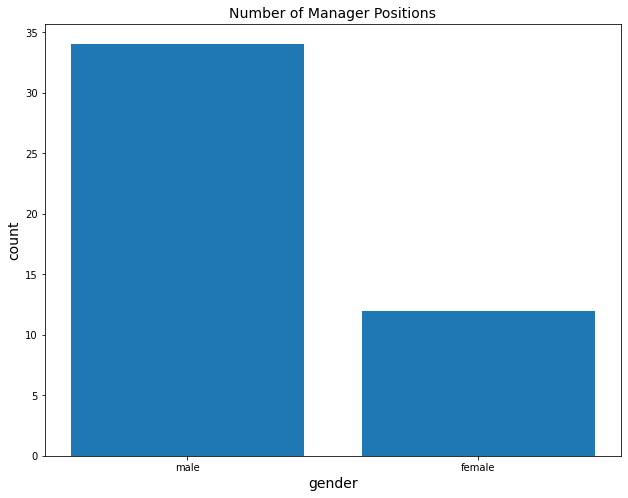

In [11]:
#number of men and women in senior levels
manager_male_count = df_copy_male.loc[df_copy_male['manager'] == 1]['age'].count()
manager_female_count = df_copy_female.loc[df_copy_female['manager'] == 1]['age'].count()

#average age of men and women in senior levels
manager_male_avg = df_copy_male.loc[df_copy_male['manager'] == 1]['age'].mean()
manager_female_avg = df_copy_female.loc[df_copy_female['manager'] == 1]['age'].mean()

print('number of manager male and average age for male manager:', manager_male_avg,",", manager_male_count)
print('number of manager female and average age for female manager:',manager_female_avg,",",manager_female_count)

print('----------'*10)
bar_plot([manager_male_count,manager_female_count],['male','female'],'gender','count','Number of Manager Positions')

average duration for men: 2.6379310344827585
average duratino for women: 1.8032786885245902
----------------------------------------------------------------------


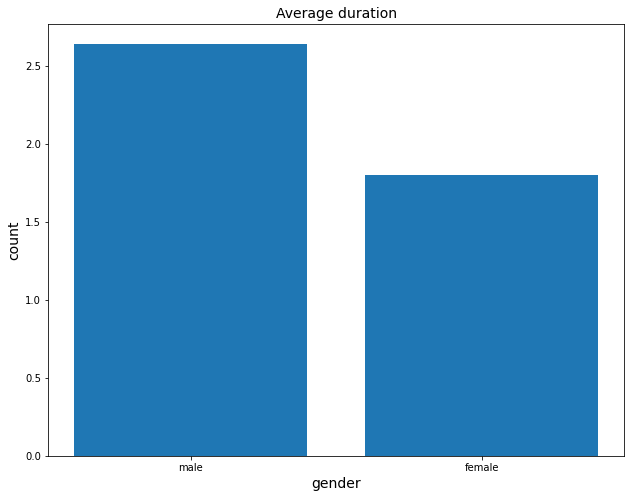

average duration for male managers: 3.264705882352941
average duration for female managers: 1.3333333333333333
--------------------------------------------------------------------------------


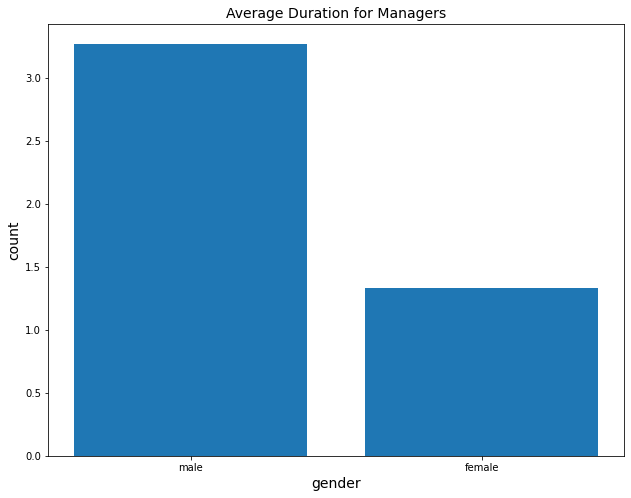

In [12]:
#average duration of men and women in the compnay
average_duration_m = df_copy.loc[df['gender'] == 'M']['duration'].mean()
average_duration_f = df_copy.loc[df['gender'] == 'F']['duration'].mean()

print('average duration for men:',average_duration_m)
print('average duratino for women:',average_duration_f)
print('-------'*10)
bar_plot([average_duration_m,average_duration_f],['male','female'],
         'gender','count','Average duration')


#average duration for managerial positons
average_duration_m_manager = df_copy_male[df_copy_male['manager'] == 1]['duration'].mean()
average_duration_f_manager = df_copy_female[df_copy_female['manager'] == 1]['duration'].mean()

print('average duration for male managers:', average_duration_m_manager)
print('average duration for female managers:', average_duration_f_manager)
print('--------'*10)
average_duration_m_manager = df_copy_male[df_copy_male['manager'] == 1]['duration'].mean()
average_duration_f_manager = df_copy_female[df_copy_female['manager'] == 1]['duration'].mean()

bar_plot([average_duration_m_manager,average_duration_f_manager],
         ['male','female'],'gender','count','Average Duration for Managers')


### NOTE

This average includes the manager postion as well, hence its not accurate. we should have included how many years or positons prior to the managerial position the candidate spent.

FOR THE DATA COLLECTION, WE SHOULD MAKE SURE THAT THE YEARS SPENT AS MANAGER IS EXCLUDED

------------------------------------------------------------------------------------------------------

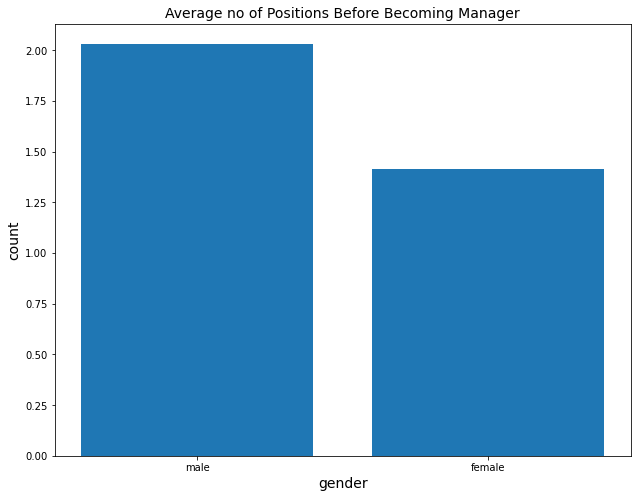

In [13]:
average_positions_m_manager = df_copy_male[df_copy_male['manager'] == 1]['no_job_positions'].mean()

average_positions_f_manager = df_copy_female[df_copy_female['manager'] == 1]['no_job_positions'].mean()

bar_plot([average_positions_m_manager,average_positions_f_manager],['male','female'],
         'gender','count','Average no of Positions Before Becoming Manager')

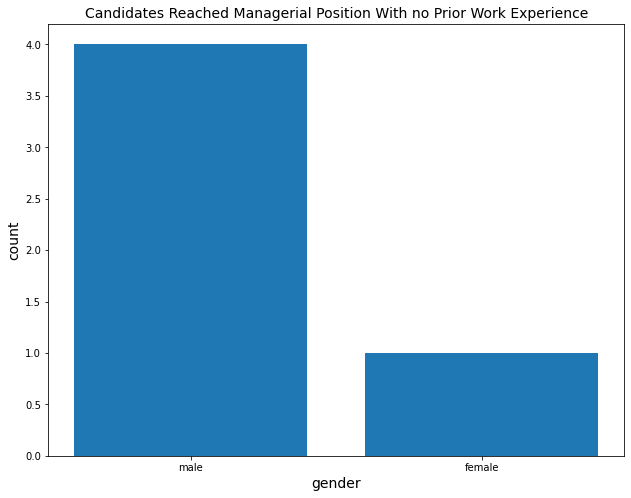

In [14]:
#number of women who joined recently and gained managerial position

no_manager_less_five_m = df_copy_male[(df_copy_male['manager'] == 1) & 
                                      (df_copy_male['duration']<=5) &
                                     (df_copy_male['no_company_10'] <=2)]['age'].count()
no_manager_less_five_f = df_copy_female[(df_copy_female['manager'] == 1) & 
                                      (df_copy_female['duration']<=5) &
                                     (df_copy_female['no_company_10'] <=2)]['age'].count()

bar_plot([no_manager_less_five_m,no_manager_less_five_f],['male','female'],'gender','count','Candidates Reached Managerial Position With no Prior Work Experience')

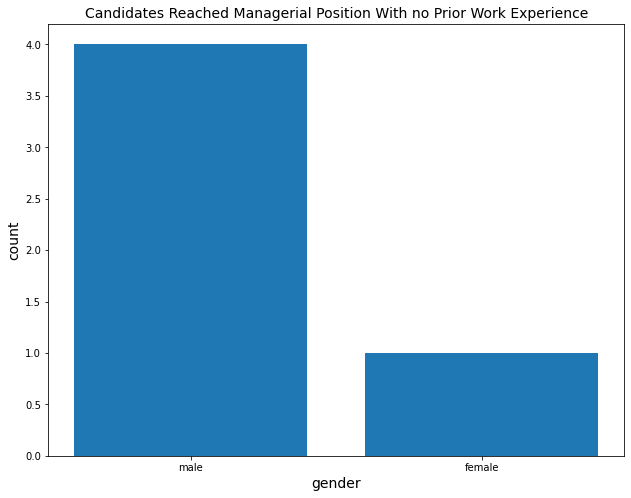

In [15]:
#number of women who joined recently and gained managerial position

no_manager_less_five_m_pos = df_copy_male[(df_copy_male['manager'] == 1) & 
                                      (df_copy_male['no_job_positions'] == 0) &
                                     (df_copy_male['no_company_10'] == 0)]['age'].count()
no_manager_less_five_f_pos = df_copy_female[(df_copy_female['manager'] == 1) & 
                                      (df_copy_female['no_job_positions']==0) &
                                     (df_copy_female['no_company_10'] == 0)]['age'].count()

bar_plot([no_manager_less_five_m,no_manager_less_five_f],['male','female'],'gender',
         'count','Candidates Reached Managerial Position With no Prior Work Experience')

### NOTE
THE FIRST PLOT SHOWS NUMBER OF MALE AND FEMALE WHO REACHED MANAGERIAL POSITION WITH LESS THAN 5 YEARS AND WORKED ON TWO MORE COMPANIES OTHER THAN SHOPIFY!

THE SECOND PLOT SHOWS NUMBER OF MALE AND FEMALE WHO REACHED MANAGERIAL POSITION WITH NO PRIOR JOB POSITIONS AND NO OTHER COMPANY PRIOR TO SHOPIFY!

IN DATA GATHERING WE SHOULD HAVE CONSIDERED THEIR LEVEL OF EDUCATION!!!

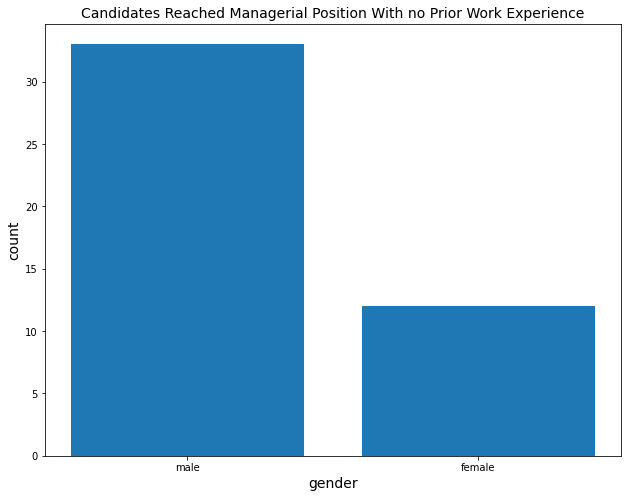

In [16]:
#number of women who joined recently and gained managerial position

no_manager_less_five_m = df_copy_male[(df_copy_male['manager'] == 1) & 
                                      (df_copy_male['duration']<=10)]['age'].count()
no_manager_less_five_f = df_copy_female[(df_copy_female['manager'] == 1) & 
                                      (df_copy_female['duration']<=10)]['age'].count()

bar_plot([no_manager_less_five_m,no_manager_less_five_f],['male','female'],'gender','count','Candidates Reached Managerial Position With no Prior Work Experience')

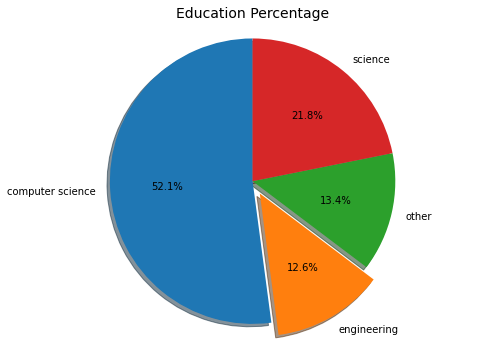

In [19]:
educ_values = df_copy.groupby('education')['name'].count()
labels = educ_values.index[:].tolist()
val = educ_values.values.tolist()
pie_chart(val,labels,'Education Percentage')

In [ ]:
#Educaitonal background for male and female in shopify 
educ_male = df_copy_male.groupby('education')['name'].count()
labels_male = educ_male.index[:]
values_male = educ_male.values[:]

pie_chart(values_male,labels_male,"Male Education")

educ_female = df_copy_female.groupby('education')['name'].count()
labels_female = educ_female.index[:]
values_female = educ_female.values[:]

pie_chart(values_female,labels_female,"Female Education")

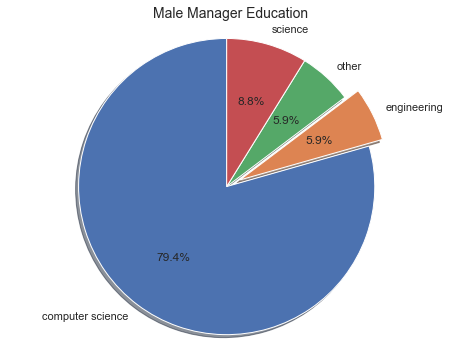

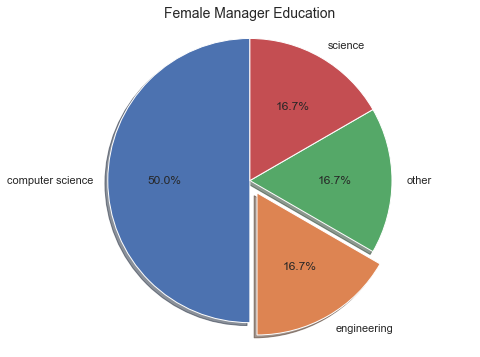

In [384]:
educ_male_manager = df_copy_male.loc[df_copy_male['manager'] == 1].groupby('education')['name'].count()
manager_value_male = educ_male_manager.values[:]
manager_index_male = educ_male_manager.index[:]

educ_female_manager = df_copy_female.loc[df_copy_female['manager'] == 1].groupby('education')['name'].count()
manager_value_female = educ_female_manager.values[:]
manager_index_female = educ_female_manager.index[:]


pie_chart(manager_value_male,manager_index_male,"Male Manager Education")
pie_chart(manager_value_female,manager_index_female,"Female Manager Education")

In [22]:
df_copy.corr(method ='pearson') 

,age,duration,no_company_10,no_job_positions,senior,manager
age,1.000000,0.103740,0.425971,0.040851,0.368669,0.484639
duration,0.103740,1.000000,-0.218574,0.703959,0.235022,0.214320
no_company_10,0.425971,-0.218574,1.000000,-0.161197,0.139020,0.139200
no_job_positions,0.040851,0.703959,-0.161197,1.000000,0.173626,0.186361
senior,0.368669,0.235022,0.139020,0.173626,1.000000,0.575522
manager,0.484639,0.214320,0.139200,0.186361,0.575522,1.000000


In [24]:
df_copy['gender'] = df_copy['gender'].apply(lambda x: 0 if x=='M' else 1)

In [26]:
df_copy.corr(method='pearson')

,age,gender,duration,no_company_10,no_job_positions,senior,manager
age,1.000000,-0.020573,0.103740,0.425971,0.040851,0.368669,0.484639
gender,-0.020573,1.000000,-0.204503,0.184521,-0.118309,-0.353182,-0.399788
duration,0.103740,-0.204503,1.000000,-0.218574,0.703959,0.235022,0.214320
no_company_10,0.425971,0.184521,-0.218574,1.000000,-0.161197,0.139020,0.139200
no_job_positions,0.040851,-0.118309,0.703959,-0.161197,1.000000,0.173626,0.186361
senior,0.368669,-0.353182,0.235022,0.139020,0.173626,1.000000,0.575522
manager,0.484639,-0.399788,0.214320,0.139200,0.186361,0.575522,1.000000
